In [4]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit

iris = datasets.load_iris()
iris_data = iris.data[:,:2]
iris_target = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(iris_data,iris_target,random_state = 5, train_size=0.8)
clf_SVM_linear = svm.SVC(kernel='linear',C=1)
clf_SVM_linear.fit(X_train,Y_train)
print(accuracy_score(clf_SVM_linear.predict(X_test),Y_test))


clf_SVC = svm.SVC(kernel = 'rbf',C=1000,gamma=0.0001)
clf_SVC.fit(X_train,Y_train)
print(accuracy_score(clf_SVC.predict(X_test),Y_test))

clf_SVC = svm.SVC(kernel = 'rbf',C=0.10000000000000001,gamma=1)
clf_SVC.fit(X_train,Y_train)
print(accuracy_score(clf_SVC.predict(X_test),Y_test))

0.833333333333
0.866666666667
0.866666666667


In [5]:
clf_linearSVM = svm.LinearSVC(C=1)
clf_linearSVM.fit(X_train,Y_train)
print(accuracy_score(clf_linearSVM.predict(X_test),Y_test))

0.789473684211


In [6]:
clf_SVM_rbf = svm.SVC(kernel='rbf',gamma=0.7, C=1)
clf_SVM_rbf.fit(X_train,Y_train)
print(accuracy_score(clf_SVM_rbf.predict(X_test),Y_test))

0.868421052632


In [7]:
clf_SVM_poly = svm.SVC(kernel='poly', degree = 3, C=1)
clf_SVM_poly.fit(X_train,Y_train)
print(accuracy_score(clf_SVM_poly.predict(X_test),Y_test))

0.842105263158


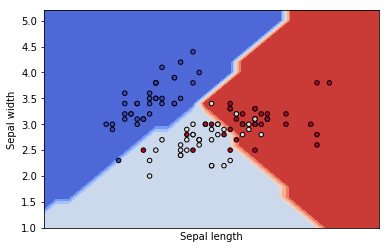

In [8]:
def make_meshgrid(x,y,h=0.2):
    x_min, x_max = x.min()-1 , x.max() + 1
    y_min, y_max = y.min()-1 , y.max() + 1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                        np.arange(y_min,y_max,h))
    return xx,yy

def make_countours(ax,clf,xx,yy,**params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


fig,ax = plt.subplots(1,1)
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)
make_countours(ax,clf_SVM_linear,xx,yy,cmap=plt.cm.coolwarm,s=20,edgecolors='k')
ax.scatter(X0, X1, c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_xticks(())
plt.show()



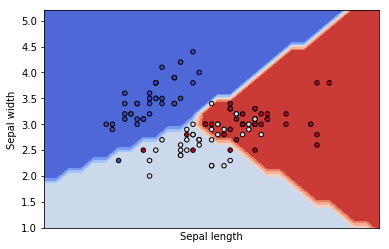

In [9]:
fig,ax = plt.subplots(1,1)
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)
make_countours(ax,clf_linearSVM,xx,yy,cmap=plt.cm.coolwarm,s=20,edgecolors='k')
ax.scatter(X0, X1, c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_xticks(())
plt.show()

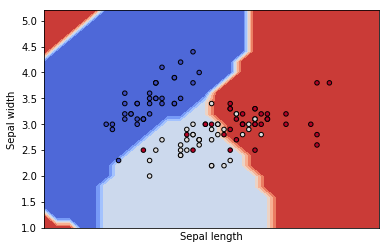

In [10]:
fig,ax = plt.subplots(1,1)
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)
make_countours(ax,clf_SVM_rbf,xx,yy,cmap=plt.cm.coolwarm,s=20,edgecolors='k')
ax.scatter(X0, X1, c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_xticks(())
plt.show()

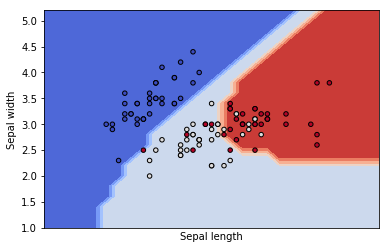

In [11]:
fig,ax = plt.subplots(1,1)
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)
make_countours(ax,clf_SVM_poly,xx,yy,cmap=plt.cm.coolwarm,s=20,edgecolors='k')
ax.scatter(X0, X1, c=Y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_xticks(())
plt.show()

In [2]:
C_range= np.logspace(-2,10,13)
gamma_range = np.logspace(-9,3,13)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(svm.SVC(),param_grid,cv=cv)
grid.fit(X_train,Y_train)
print(grid.best_params_)

{'C': 0.10000000000000001, 'gamma': 1.0}


Automatically created module for IPython interactive environment
The best parameters are {'C': 1.0, 'gamma': 0.10000000000000001} with a score of 0.97


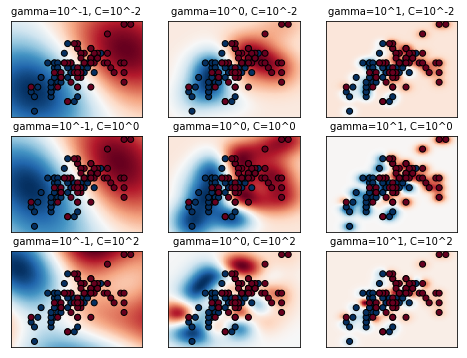

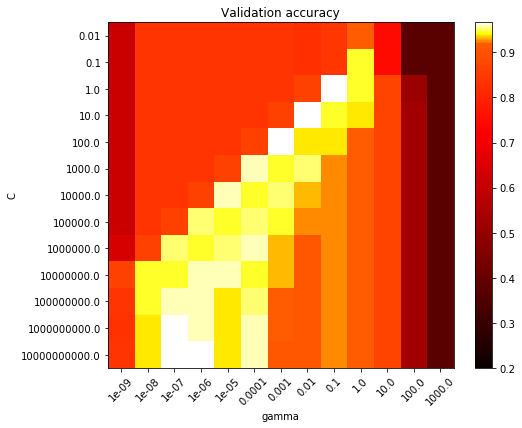

In [11]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

# #############################################################################
# Load and prepare data set
#
# dataset for grid search

iris = load_iris()
X = iris.data
y = iris.target

# Dataset for decision function visualization: we only keep the first two
# features in X and sub-sample the dataset to keep only 2 classes and
# make it a binary classification problem.

X_2d = X[:, :2]
X_2d = X_2d[y > 0]
y_2d = y[y > 0]
y_2d -= 1

# It is usually a good idea to scale the data for SVM training.
# We are cheating a bit in this example in scaling all of the data,
# instead of fitting the transformation on the training set and
# just applying it on the test set.

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)

# #############################################################################
# Train classifiers
#
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classifiers.append((C, gamma, clf))

# #############################################################################
# Visualization
#
# draw visualization of parameter effects

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
              size='medium')

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r,
                edgecolors='k')
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

In [10]:
C_range= np.logspace(-2,10,13)
gamma_range = np.logspace(-9,3,13)
C_range

array([  1.00000000e-02,   1.00000000e-01,   1.00000000e+00,
         1.00000000e+01,   1.00000000e+02,   1.00000000e+03,
         1.00000000e+04,   1.00000000e+05,   1.00000000e+06,
         1.00000000e+07,   1.00000000e+08,   1.00000000e+09,
         1.00000000e+10])

In [11]:
gamma_range

array([  1.00000000e-09,   1.00000000e-08,   1.00000000e-07,
         1.00000000e-06,   1.00000000e-05,   1.00000000e-04,
         1.00000000e-03,   1.00000000e-02,   1.00000000e-01,
         1.00000000e+00,   1.00000000e+01,   1.00000000e+02,
         1.00000000e+03])

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(iris_data,iris_target,random_state = 5, train_size=0.8)
C_range= np.logspace(-2,10,13)
gamma_range = np.logspace(-9,3,13)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(svm.SVC(),param_grid,cv=cv)
grid.fit(X_train,Y_train)
print(grid.best_params_)



{'C': 0.10000000000000001, 'gamma': 1.0}


In [10]:
clf_SVC = svm.SVC(kernel = 'rbf',C=.1,gamma=1
                 )
clf_SVC.fit(X_train,Y_train)
print(accuracy_score(clf_SVC.predict(X_test),Y_test))

0.866666666667
